# Saarthak Marathe | ME17B162

## Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### A. Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.35$ and a fixed random state = $42$.
2. Fit and visualize a decision tree classifier. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
import sklearn.datasets as sd
X,y = sd.make_moons(n_samples=100, noise=0.35, random_state=42)

In [10]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

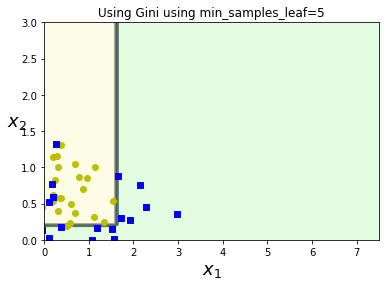

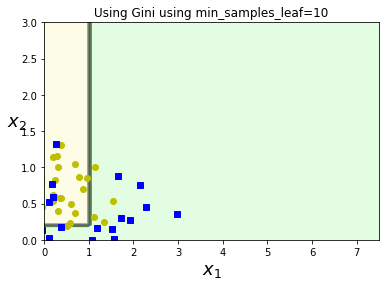

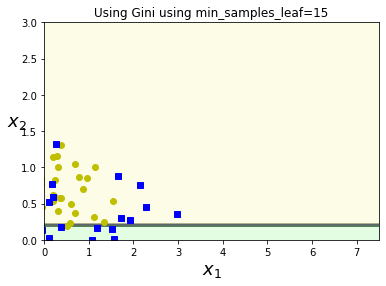

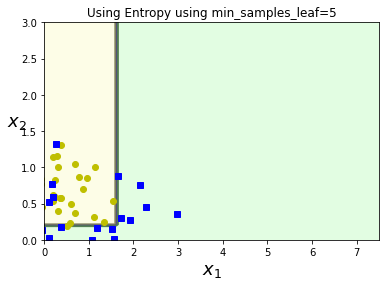

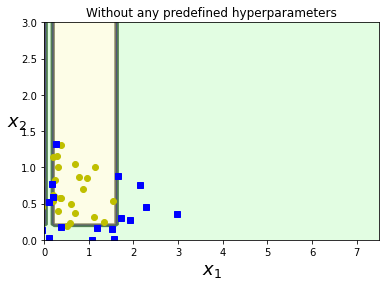

In [18]:
#Answewr here
#from sklearn.metrics import confusion_matrix 
#from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
#from sklearn.metrics import accuracy_score 
#from sklearn.metrics import classification_report 

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X, y) 
plot_decision_boundary(clf_gini, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Using Gini using min_samples_leaf=5')
plt.show()

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=10) 
clf_gini.fit(X, y) 
plot_decision_boundary(clf_gini, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Using Gini using min_samples_leaf=10')
plt.show()

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=15) 
clf_gini.fit(X, y) 
plot_decision_boundary(clf_gini, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Using Gini using min_samples_leaf=15')
plt.show()

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5) 
clf_entropy.fit(X, y) 
plot_decision_boundary(clf_entropy, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Using Entropy using min_samples_leaf=5')
plt.show()

clf = DecisionTreeClassifier(random_state=100) 
clf.fit(X, y) 
plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Without any predefined hyperparameters')
plt.show()

#### Q. Comment on the overfitting nature of the Decision trees

**Answer**

1. As we tend to increase the no of minimum decision tree, we increase the chances of overfitting
2. Both the criterions gave similar results 
3. Plot without any predefined hyperparameters gave the best fit of all the tried above. This uses gini method with min_sample_leaf=1, max_depth=None by default

## B. Overfitting in decision tree classifiers

1. List and explain in a few lines, three of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
2. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 
3. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $5$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 

**1. Three of the regularization hyperparameters used while building a decision tree**

1. **Criterion**: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Both methods use different loss functions which work better in different scenarios
2. **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. It helps in overcoming overfitting by controlling how deep in the noes we need to go
3. **min_sample_leaf**: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. If we let the number go too low, then the chances of overfitting increases

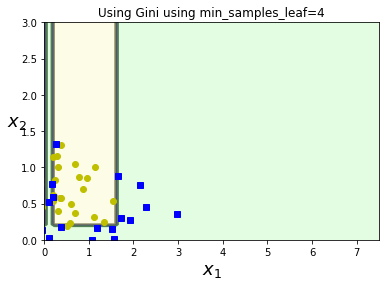

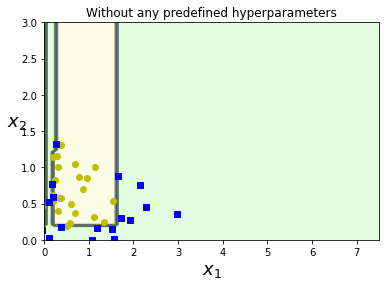

In [21]:
#question2
clf = DecisionTreeClassifier(random_state = 42, min_samples_leaf=4) 
clf.fit(X, y) 
plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Using Gini using min_samples_leaf=4')
plt.show()

clf = DecisionTreeClassifier(random_state=42) 
clf.fit(X, y) 
plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Without any predefined hyperparameters')
plt.show()

The model with no predefined hyperparameters tends to categorize and generalize it better than the other model

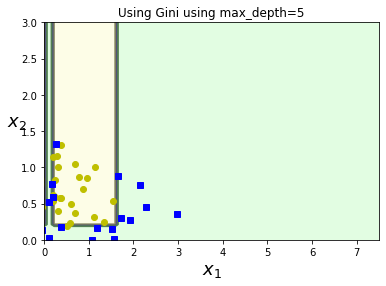

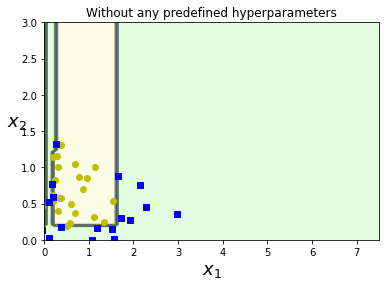

In [22]:
#question3
clf = DecisionTreeClassifier(random_state = 42, max_depth=5) 
clf.fit(X, y) 
plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Using Gini using max_depth=5')
plt.show()

clf = DecisionTreeClassifier(random_state=42) 
clf.fit(X, y) 
plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True)
plt.title('Without any predefined hyperparameters')
plt.show()

The model with no predefined hyperparameters tends to categorize and generalize it better than the other model

#### Q. Comment on the boundary surface of the decision tree. 
Hint: Observe the orthogonality of the boundary

1. All the boundaries tend to be perpendicular/parallel to the axes, this is where the orthogonality comes in. 
2. The boundaries are decided based on the perpendicular distance between the points and the boundaries

### C. Linear classifiers vs decision tree classifiers

In [25]:
#Generate 100 points [x1, x2] in the 2D plane using np.random.rand() for -0.5<x1<0.5 and -0.5<x2<0.5
x = np.random.rand(100,2) - 0.5
y = np.zeros(100)
#Assign a label of 1 to all points having x1>0.0 and 0 otherwise
y[x[:,0]>0] = 1
#Rotate the dataset by 45 degrees in the [x1,x2] plane
rot = [[0.414,-0.414],[0.414,0.414]]
x_rot = np.matmul(rot,x.T)
x_rot = x_rot.T

1. Fit a linear Logistic Regression model and Decision Tree on the x_rot
2. Fit a linear Logistic Regression model and Decision tree on the make_moons dataset generated in A(1)


In [28]:
#question1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(x_rot, y, test_size=0.25, random_state = 42)

clf = LogisticRegression()
clf = clf.fit(X_train,y_train)
print('Logistic Regression')
print('Pred accuracy for training set:', clf.score(X_train,y_train))
print('Pred accuracy for validation set:', clf.score(X_val,y_val))

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print('\nDecision Tree')
print('Pred accuracy for training set:', clf.score(X_train,y_train))
print('Pred accuracy for validation set:', clf.score(X_val,y_val))

Logistic Regression
Pred accuracy for training set: 0.9466666666666667
Pred accuracy for validation set: 0.88

Decision Tree
Pred accuracy for training set: 1.0
Pred accuracy for validation set: 0.84


In [31]:
#question2
X,y = sd.make_moons(n_samples=100, noise=0.35, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state = 42)

clf = LogisticRegression()
clf = clf.fit(X_train,y_train)
print('Logistic Regression')
print('Pred accuracy for training set:', clf.score(X_train,y_train))
print('Pred accuracy for validation set:', clf.score(X_val,y_val))

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print('\nDecision Tree')
print('Pred accuracy for training set:', clf.score(X_train,y_train))
print('Pred accuracy for validation set:', clf.score(X_val,y_val))

Logistic Regression
Pred accuracy for training set: 0.8133333333333334
Pred accuracy for validation set: 0.96

Decision Tree
Pred accuracy for training set: 1.0
Pred accuracy for validation set: 0.76


#### Q. Compare the performance of Decision Trees and logistic regression on the two datasets

1. Decision tree fits better for the training set
2. Logistic regression fits better for the validation set

## D. Regression using decision trees

1. Train a regression tree on the noisy sine dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [33]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Sine + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = np.sin(2*np.pi*X) + np.random.randn(150, 1) / 10

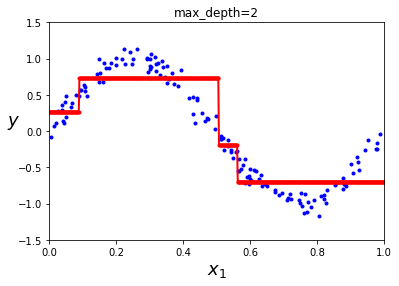

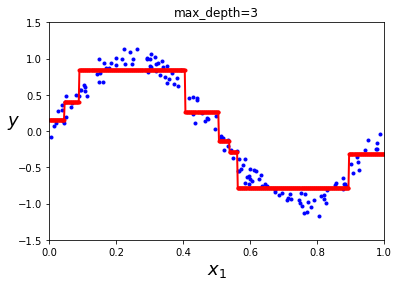

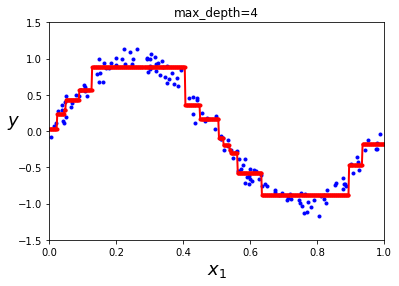

In [38]:
from sklearn.tree import DecisionTreeRegressor

for depth in [2,3,4]:
    dtreg = DecisionTreeRegressor(random_state=42,max_depth=depth)
    dtreg = dtreg.fit(X,y)
    plot_regression_predictions(dtreg, X, y, axes=[0, 1, -1.5, 1.5], ylabel="$y$")
    plt.title('max_depth=%d'%depth)
    plt.show()

### E. Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 

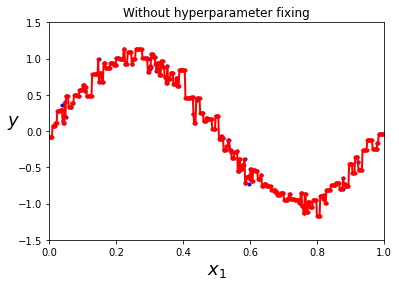

In [40]:
dtreg = DecisionTreeRegressor(random_state=42)
dtreg = dtreg.fit(X,y)
plot_regression_predictions(dtreg, X, y, axes=[0, 1, -1.5, 1.5], ylabel="$y$")
plt.title('Without hyperparameter fixing')
plt.show()

Without any hyperparameter fixing (no regularization), the model tends to overfit because it tries to cover each point of the dataset. Also, the min_sample_split's default value 2 also has to play a role over here.

### F. Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.5$). Random seed = 42 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $35$ for max_leaf_nodes and $2$ to $10$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [49]:
X,y = sd.make_moons(n_samples=10000, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

from sklearn.model_selection import GridSearchCV

parameters = {'max_leaf_nodes':range(2,36), 'min_samples_split':range(2,11)}
DTC = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(DTC, parameters)
clf = clf.fit(X_train,y_train)
print('Optimal max_leaf_nodes =',clf.best_params_['max_leaf_nodes'])
print('Optimal min_samples_split =', clf.best_params_['min_samples_split'])
print("Pred accuracy on test set:" ,clf.score(X_test,y_test))

Optimal max_leaf_nodes = 11
Optimal min_samples_split = 2
Pred accuracy on test set: 0.8136


### G. Training the Random Forest model
1. Load the loans dataset and use one-hot encoding for the column 'purpose'
2. Split the data into test and train sets with ratio 70:30 with random seed = 101
3. Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
4. Predict the class of not.fully.paid for the X_test data
5. Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [57]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df_onehot = pd.get_dummies(df['purpose'], prefix='purpose')
df = df.drop(columns=['purpose'])
df = pd.concat([df,df_onehot],axis=1)

y = df['not.fully.paid']
X=df
del X['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_test_pred))
#print('\n')

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



d:\extraction\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
set(y_test), set(y_test_pred)

({0, 1}, {0})

We do see the warning because few labels for 'y' are put as 0.0 due to ill-defined values. while testing and creating the classification report, we see that only '0' labels are present in the y_test_pred whereas in actual '0,1' both labels are to be present in the testing set.